In [112]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import re
import openpyxl
import sklearn
from keras.utils import to_categorical
from keras.datasets import mnist

## Read In Data

The data are 16 x 16 grayscale images. There are 7291 training observations and 2007 test observations. ()

In [113]:
data = open("zip.train","r+")
training_data = list(csv.reader(data))
data.close()

data = open("zip.test","r+")
testing_data = list(csv.reader(data))
data.close()


## Data Exploration

We can see that the training data is in 2D format, where each inner element contains the digit label, and the 256 values. Moreover, the inner elements seems to be stored as a long string, so we will need to do some processing to convert it into the correct format for Neural Nets.

In [114]:
type(training_data), training_data

(list,
 [['6.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.6310 0.8620 -0.1670 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.9920 0.2970 1.0000 0.3070 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.4100 1.0000 0.9860 -0.5650 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.6830 0.8250 1.0000 0.5620 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.9380 0.5400 1.0000 0.7780 -0.7150 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 0.1000 1.0000 0.9220 -0.4390 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.2570 0.9500 1.0000 -0.1620 -1.0000 -1.0000 -1.0000 -0.9870 -0.7140 -0.8320 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.7970 0.9090 1.0000 0.3000 -0.9610 -1.0000 -1.0000 -0.5500 0.4850 0.9960 0.8670 0.092

## Data Pre-Processing

In [115]:
def preprocess_data(data): 
    X = []
    y = [] 
    
    for digit_data in data:
        digit_data = digit_data[0] # Since the digit data is stored as a string within a one-item list
        digit_data = digit_data.strip()
        temp_data = np.array(digit_data.split(' '))
        temp_data = temp_data.astype(float)

        y.append(int(temp_data[0])) # Add digit label to y list. Convert it to integer because we are trying to predict integers 0-9
        X.append(temp_data[1:]) # Add image values to X. These are the features that will be used to train the model

    X = np.array(X)
    y = np.array(y)

    return X, y


In [116]:
X_train, y_train = preprocess_data(training_data)

### Reshape image data so it's in the correct format for the convolutional layers

In [117]:
X_train = X_train.reshape(-1, 16, 16, 1)
X_train.shape

(7291, 16, 16, 1)

### Convert y values to categorical data

In [118]:
y_train_onehot = to_categorical(y_train)
y_train_onehot[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

Sanity Check: They need to be the same size, and y_train should have only integer values, while each row of X_train should be 256 float values.

In [119]:
print("Length of X_train:", len(X_train), "and of y_train:", len(y_train))
print("Length of X_train rows:", len(X_train[0]))
print("Type of y_train items: ", type(y_train[0]))
print("Length of y_train_onehot rows: ", len(y_train_onehot[0])) # 10, because we have 10 classes we're predicting

Length of X_train: 7291 and of y_train: 7291
Length of X_train rows: 16
Type of y_train items:  <class 'numpy.int64'>
Length of y_train_onehot rows:  10


## Build & Train the Model

In [120]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # The input shape is the image size of 16x16, and a single byte for color depth since it is grayscale
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(16, 16, 1)), # Will decrease shape to 14x14 due to filter
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), # At this point our images are 3x3, rather than the initial 16x16
    tf.keras.layers.Dropout(.1), # Drop some neurons to avoid overfitting
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    # We have 10 neurons here because we have 10 different classes (digits 0-9)
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 14, 14, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 5, 5, 64)          18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 2, 2, 64)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 256)               0         
                                                                 
 dropout_7 (Dropout)         (None, 256)              

In [121]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [122]:
history = model.fit(X_train, y_train_onehot, epochs = 20)

Epoch 1/20
228/228 [==============================] - 1s 3ms/step - loss: 0.5472 - accuracy: 0.8361
Epoch 2/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1390 - accuracy: 0.9619
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 0.0987 - accuracy: 0.9698
Epoch 4/20
228/228 [==============================] - 1s 3ms/step - loss: 0.0664 - accuracy: 0.9801
Epoch 5/20
228/228 [==============================] - 1s 3ms/step - loss: 0.0562 - accuracy: 0.9823
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.0393 - accuracy: 0.9892
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.0352 - accuracy: 0.9899
Epoch 8/20
228/228 [==============================] - 1s 3ms/step - loss: 0.0259 - accuracy: 0.9942
Epoch 9/20
228/228 [==============================] - 1s 3ms/step - loss: 0.0298 - accuracy: 0.9916
Epoch 10/20
228/228 [==============================] - 1s 4ms/step - loss: 0.0257 - accuracy: 0.9925

### Plot accuracy as a variable of epoch. 
As we can see, after about 10th epoch, the model is improving only slightly, so it is better to train it on less epochs to avoid overfitting.

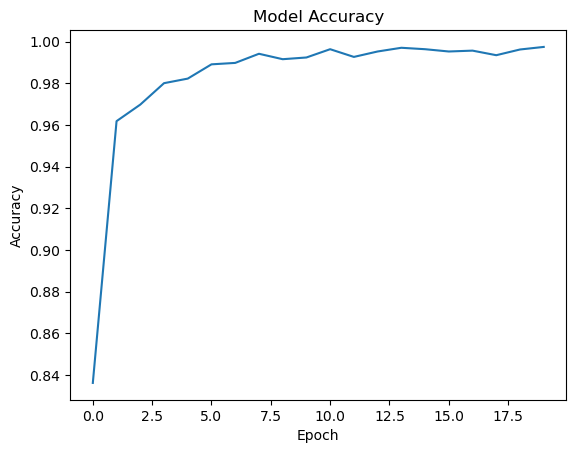

In [123]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


## Test Model

In [124]:
X_test, y_test = preprocess_data(testing_data)

In [125]:
X_test = X_test.reshape(-1, 16, 16, 1)
X_test.shape

(2007, 16, 16, 1)

In [126]:
y_test_onehot = to_categorical(y_test)
y_test_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [128]:
loss, accuracy = model.evaluate(X_test, y_test_onehot)

63/63 [==============================] - 0s 2ms/step - loss: 0.2155 - accuracy: 0.9641


Test loss: 0.21552778780460358
Test accuracy: 0.9641255736351013


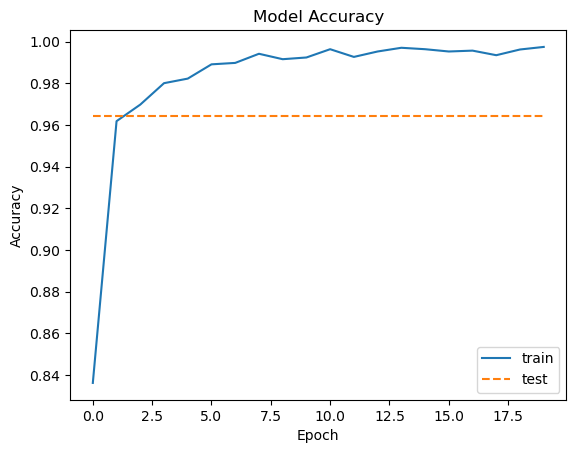

In [129]:

print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Plot the test accuracy
plt.plot(history.history['accuracy'])
plt.plot([0, len(history.history['accuracy']) - 1], [accuracy, accuracy], linestyle='--')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()